# Esercizio 07.1

In questo esercizio andrò a simulare un sistema analogo a quello già visto nella lezione 4, campionando però le posizione delle particelle con un algoritmo di Metropolis. In particolare eseguirò una simulazione del sistema nell'ensamble canonico (T fissata), dove il mio Metropolis campionerà la distribuzione di Boltzmann.

## Fase solida

### a)

Ho eseguito la simulazione per la fase solida con i paramentri richiesti: $\rho^\star = 1.1$, $T^\star = 0.8$, $r_c = 2.2$. Ho simulato 1000 punti in più dei $10^5$ richiesti per far equilibrare il sistema. Di seguito plotto l'autocorrelazione della pressione.

In [2]:
import numpy as np
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import math
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

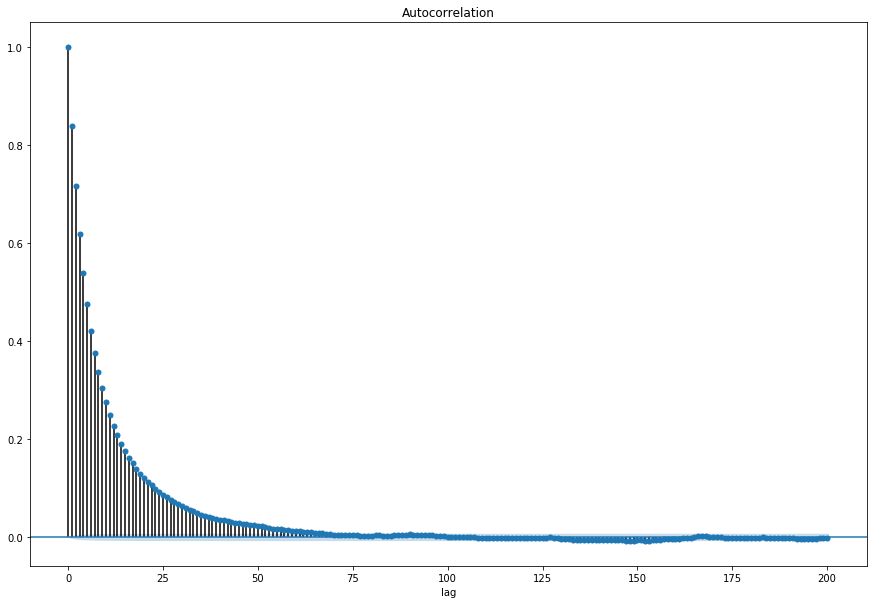

In [9]:
filename = "MonteCarlo_NVT_2/esercizio07_1/solid/pressure.dat"

#carico i dati
f = open(filename, 'r')
pres = f.readlines()
pres_ = [float(t) for t in pres]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
pres_ = pres_[1000:]
lags_ = np.arange(50,80,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(pres_, lags=200)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

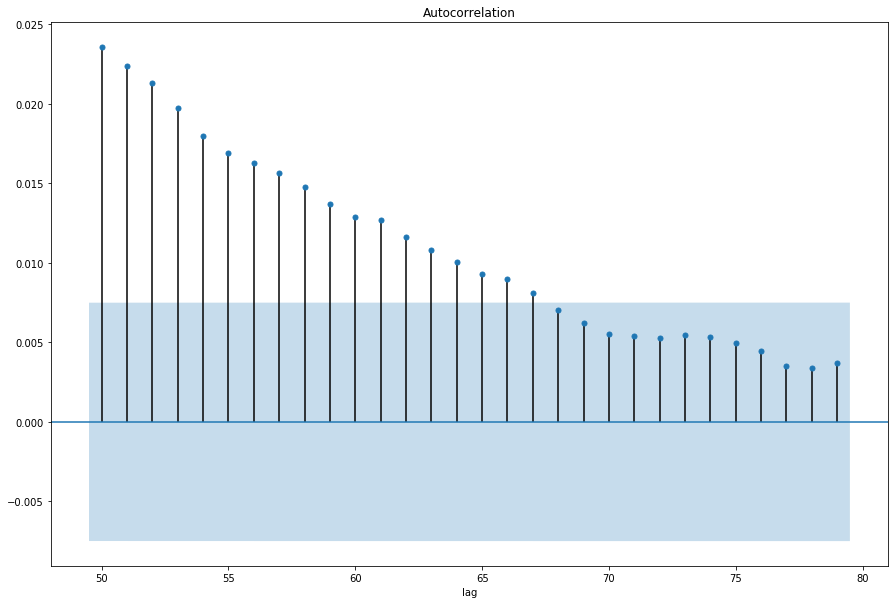

In [10]:
filename = "MonteCarlo_NVT_2/esercizio07_1/solid/pressure.dat"

#carico i dati
f = open(filename, 'r')
pres = f.readlines()
pres_ = [float(t) for t in pres]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
pres_ = pres_[1000:]
lags_ = np.arange(50,80,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(pres_, lags=lags_)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

Si può notare che attorno a un lag di 70 time step l'autocorrelazione rientri all'interno dell'intervallo di confidenza, per cui si può dire che i dati inizino ad essere scorrelati.

Di seguito plotto l'autocorrelazione dell'energia potenziale.

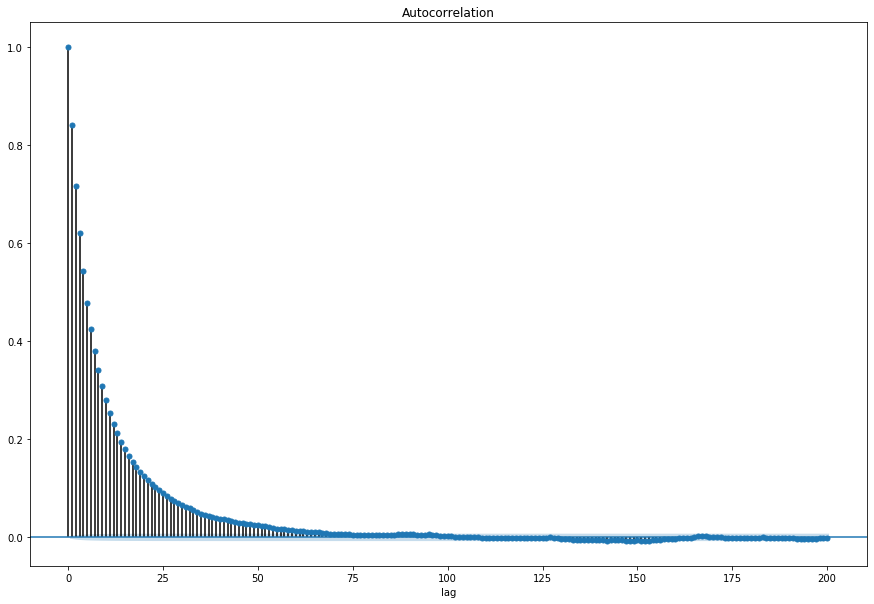

In [11]:
filename = "MonteCarlo_NVT_2/esercizio07_1/solid/en_pot.dat"

#carico i dati
f = open(filename, 'r')
en = f.readlines()
en_ = [float(t) for t in en]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
en_ = en_[1000:]

#plot autocorrelation function
fig = tsaplots.plot_acf(en_, lags=200)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

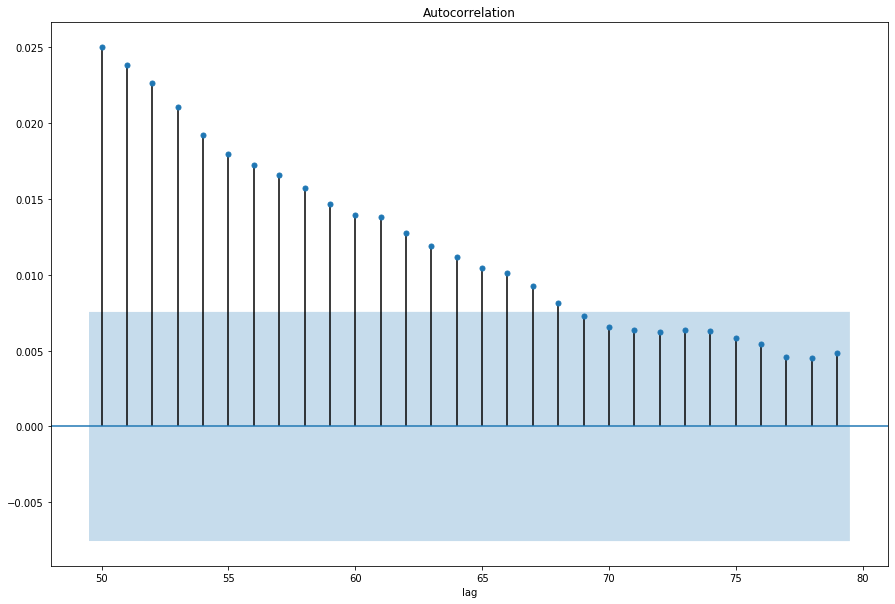

In [12]:
filename = "MonteCarlo_NVT_2/esercizio07_1/solid/en_pot.dat"

#carico i dati
f = open(filename, 'r')
en = f.readlines()
en_ = [float(t) for t in en]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
en_ = en_[1000:]
lags_ = np.arange(50,80,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(en_, lags=lags_)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

Si può notare come anche dai due grafici dell'autocorrelazione dell'energia potenziale si evinca che attorno a un lag di 70 time step la serie temporale si scorreli. 

### b)

In [13]:
dim_blocks = []

err_en = np.zeros(500)
err_p = np.zeros(500)

npoints = 500000

for i in range(1,501):
    
    dim_blocks.append(i*10)
    nblocks = math.floor(npoints/(i*10))

    sumA_en = 0
    sumA2_en = 0
    
    sumA_p = 0
    sumA2_p = 0
    
    for j in range(nblocks):
        
        A_en = 0
        A2_en = 0
        
        A_p = 0
        A2_p = 0

        for k in range(dim_blocks[i-1]):
            
            A_en = A_en + en_[j*dim_blocks[i-1]+k]
            A_p = A_p + pres_[j*dim_blocks[i-1]+k]
            
        A_en = A_en/dim_blocks[i-1] 
        A2_en = A_en**2
        
        A_p = A_p/dim_blocks[i-1]
        A2_p = A_p**2
        
        sumA_en = sumA_en + A_en
        sumA2_en = sumA2_en + A2_en
        
        sumA_p = sumA_p + A_p
        sumA2_p = sumA2_p + A2_p
    
    err_en[i-1] = np.sqrt((1./(nblocks-1))*(sumA2_en/nblocks-(sumA_en/nblocks)**2))
    err_p[i-1] = np.sqrt((1./(nblocks-1))*(sumA2_p/nblocks-(sumA_p/nblocks)**2))
    
        
        

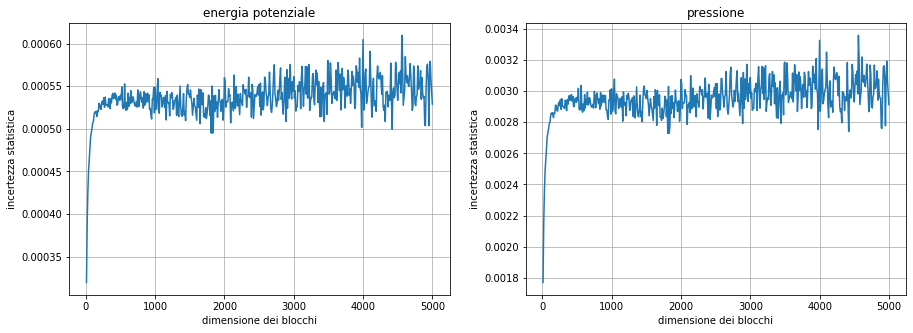

In [14]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

plt.subplot(1,2,1)
plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('energia potenziale')
plt.plot(dim_blocks,err_en)
plt.grid(True)

plt.subplot(1,2,2)
plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('pressione')
plt.plot(dim_blocks,err_p)
plt.grid(True)

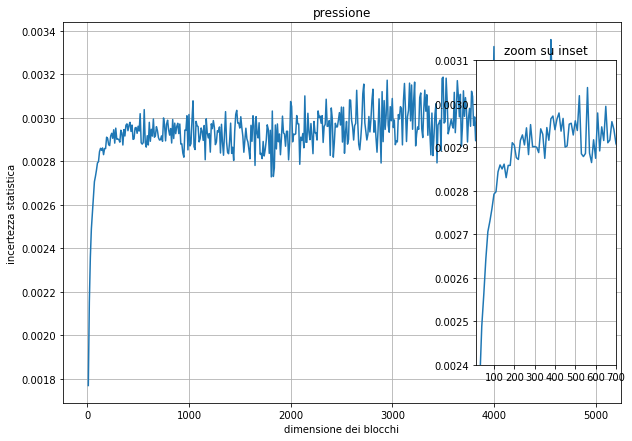

In [15]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

fig, ax = plt.subplots()
#fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(7)

plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('pressione')
ax.plot(dim_blocks,err_p)
plt.grid(True)

zax = zoomed_inset_axes(ax, 2, loc=7)
plt.plot(dim_blocks,err_p)
zax.set_xlim((10,700)) ; zax.set_xticks((100, 200, 300, 400, 500, 600, 700))
zax.set_ylim((0.0024, 0.0031))
plt.title('zoom su inset')
plt.grid(True)

f.close()

Dai grafici precedenti possiamo osservare che all'aumentare della dimensione dei blocchi l'incertezza statistica calcolata aumenta (dimensione tra 10 e 300 circa) e poi satura (da 300 a 5000). Da questo deduco che la dimensione minima dei blocchi per avere una corretta stima dell'incertezza statistica è attorno ai 300 punti.

## Fase liquida

### a)

Ho eseguito la simulazione per la fase liquida con i paramentri richiesti: $\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$. Ho simulato 1000 punti in più dei $10^5$ richiesti per far equilibrare il sistema. Di seguito plotto l'autocorrelazione della pressione.

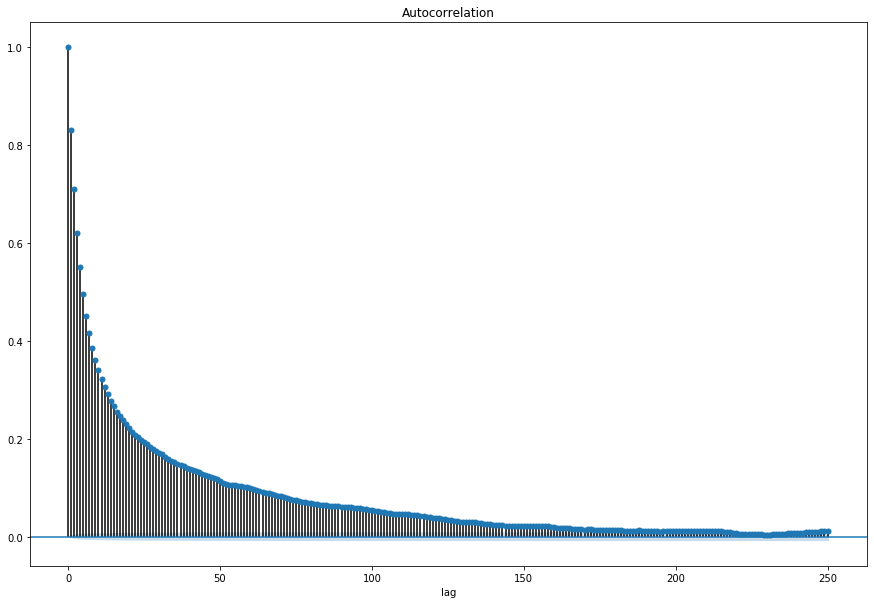

In [16]:
filename = "MonteCarlo_NVT_2/esercizio07_1/liquid/pressure.dat"

#carico i dati
f = open(filename, 'r')
pres = f.readlines()
pres_ = [float(t) for t in pres]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
pres_ = pres_[1000:]
lags_ = np.arange(50,80,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(pres_, lags=250)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

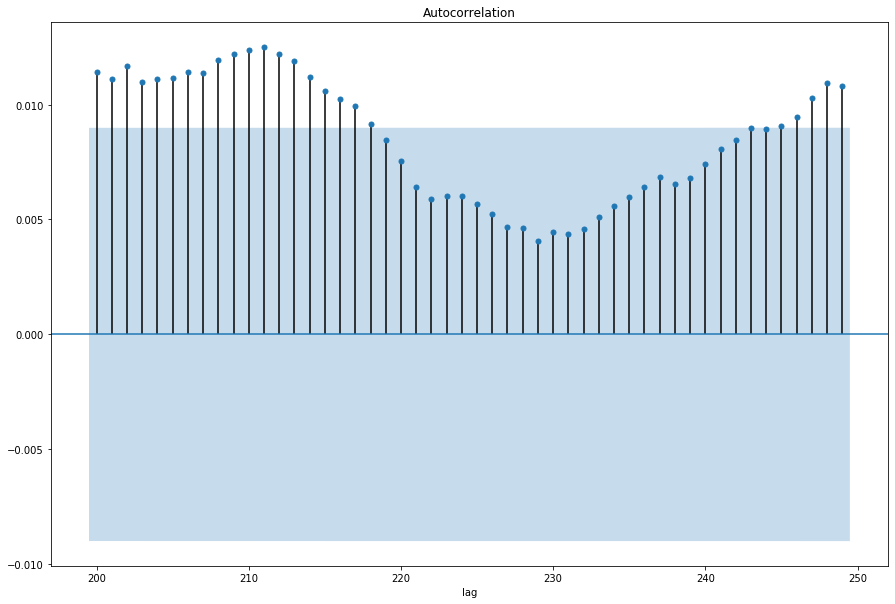

In [17]:
filename = "MonteCarlo_NVT_2/esercizio07_1/liquid/pressure.dat"

#carico i dati
f = open(filename, 'r')
pres = f.readlines()
pres_ = [float(t) for t in pres]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
pres_ = pres_[1000:]
lags_ = np.arange(200,250,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(pres_, lags=lags_)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

Si può notare che attorno a un lag di 220 time step l'autocorrelazione rientri all'interno dell'intervallo di confidenza, per cui si può dire che i dati inizino ad essere scorrelati.

Di seguito plotto l'autocorrelazione dell'energia potenziale.

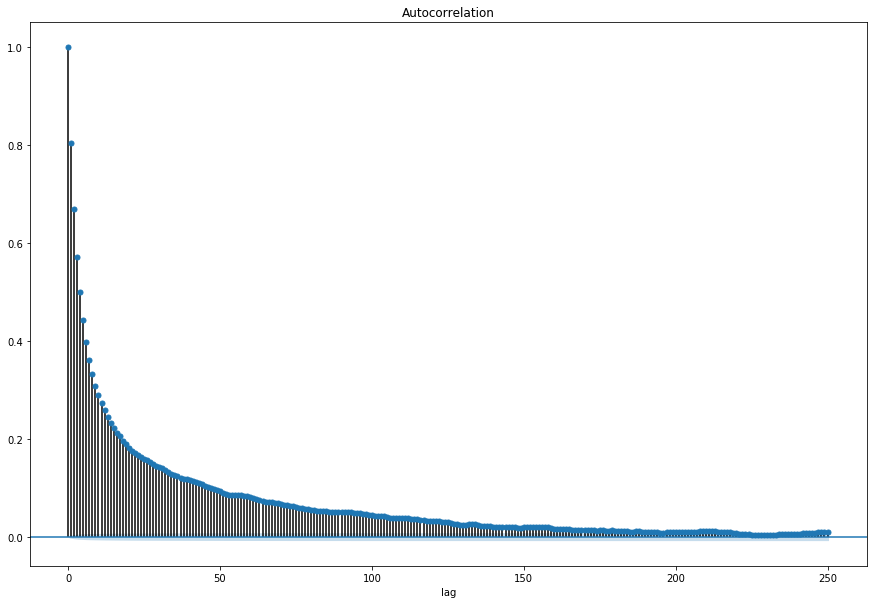

In [18]:
filename = "MonteCarlo_NVT_2/esercizio07_1/liquid/en_pot.dat"

#carico i dati
f = open(filename, 'r')
en = f.readlines()
en_ = [float(t) for t in en]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
en_ = en_[1000:]

#plot autocorrelation function
fig = tsaplots.plot_acf(en_, lags=250)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

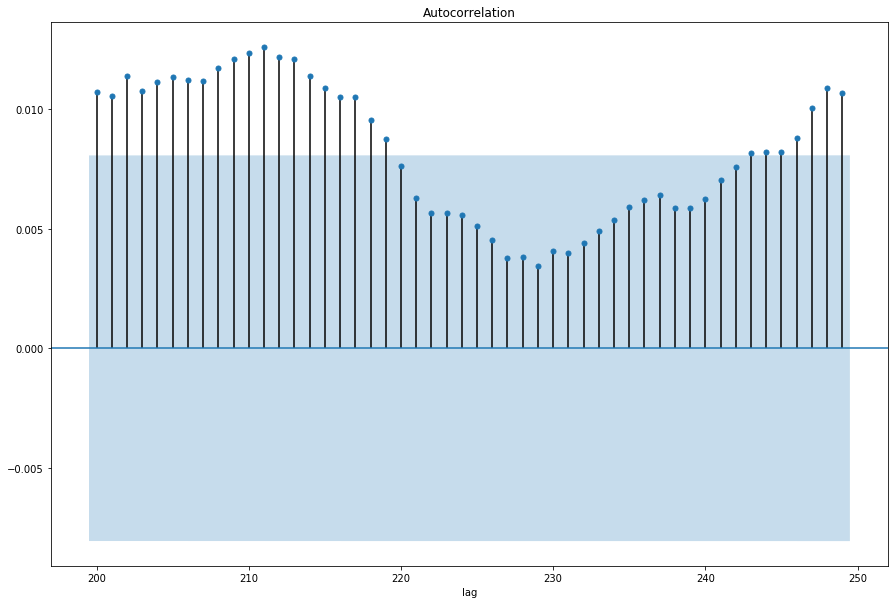

In [19]:
filename = "MonteCarlo_NVT_2/esercizio07_1/liquid/en_pot.dat"

#carico i dati
f = open(filename, 'r')
en = f.readlines()
en_ = [float(t) for t in en]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
en_ = en_[1000:]
lags_ = np.arange(200,250,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(en_, lags=lags_)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

Si può notare come anche dai due grafici dell'autocorrelazione dell'energia potenziale si evinca che attorno a un lag di 220 time step la serie temporale si scorreli.

### b)

In [20]:
dim_blocks = []

err_en = np.zeros(500)
err_p = np.zeros(500)

npoints = 500000

for i in range(1,501):
    
    dim_blocks.append(i*10)
    nblocks = math.floor(npoints/(i*10))

    sumA_en = 0
    sumA2_en = 0
    
    sumA_p = 0
    sumA2_p = 0
    
    for j in range(nblocks):
        
        A_en = 0
        A2_en = 0
        
        A_p = 0
        A2_p = 0

        for k in range(dim_blocks[i-1]):
            
            A_en = A_en + en_[j*dim_blocks[i-1]+k]
            A_p = A_p + pres_[j*dim_blocks[i-1]+k]
            
        A_en = A_en/dim_blocks[i-1] 
        A2_en = A_en**2
        
        A_p = A_p/dim_blocks[i-1]
        A2_p = A_p**2
        
        sumA_en = sumA_en + A_en
        sumA2_en = sumA2_en + A2_en
        
        sumA_p = sumA_p + A_p
        sumA2_p = sumA2_p + A2_p
    
    err_en[i-1] = np.sqrt((1./(nblocks-1))*(sumA2_en/nblocks-(sumA_en/nblocks)**2))
    err_p[i-1] = np.sqrt((1./(nblocks-1))*(sumA2_p/nblocks-(sumA_p/nblocks)**2))
    
        
        

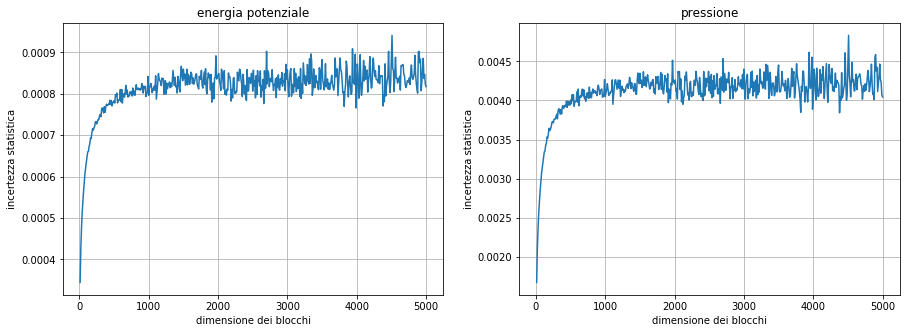

In [21]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

plt.subplot(1,2,1)
plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('energia potenziale')
plt.plot(dim_blocks,err_en)
plt.grid(True)

plt.subplot(1,2,2)
plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('pressione')
plt.plot(dim_blocks,err_p)
plt.grid(True)

In questo caso notiamo che solo per blocchi di circa 1000 time step l'incertezza statistica satura.

## Fase gassosa

### a)

Ho eseguito la simulazione per la fase gassosa con i paramentri richiesti: $\rho^\star = 0.05$, $T^\star = 1.2$, $r_c = 5$. Ho simulato 1000 punti in più dei $10^5$ richiesti per far equilibrare il sistema. Ho incontrato il problema di non riuscire a ridurre il rate di accettazione del Metropolis al di sotto del 60% circa. Per aggirare il problema ho provato ad aumentare la larghezza della distribuzione uniforme che uso per il campionamento, ma è chiaro che non ha senso aumentare tale dimensione oltre la lunghezza del lato del box a causa della presenza delle periodic boundary conditions. Si potrebbe pensare di aumentare il numero di particelle, in modo da avere un box più grande, ma non mi sono spinto a seguire questa strada. Mi sono accontentato dunque di un rate di accettazione più alto del 50%. Di seguito plotto l'autocorrelazione della pressione.

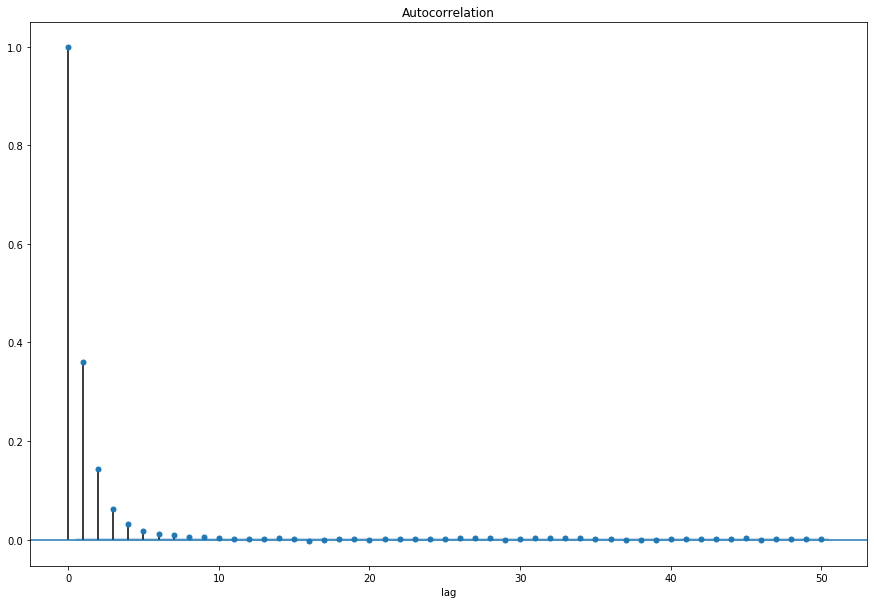

In [24]:
filename = "MonteCarlo_NVT_2/esercizio07_1/gas2/pressure.dat"

#carico i dati
f = open(filename, 'r')
pres = f.readlines()
pres_ = [float(t) for t in pres]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
pres_ = pres_[1000:]

#plot autocorrelation function
fig = tsaplots.plot_acf(pres_, lags=50)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

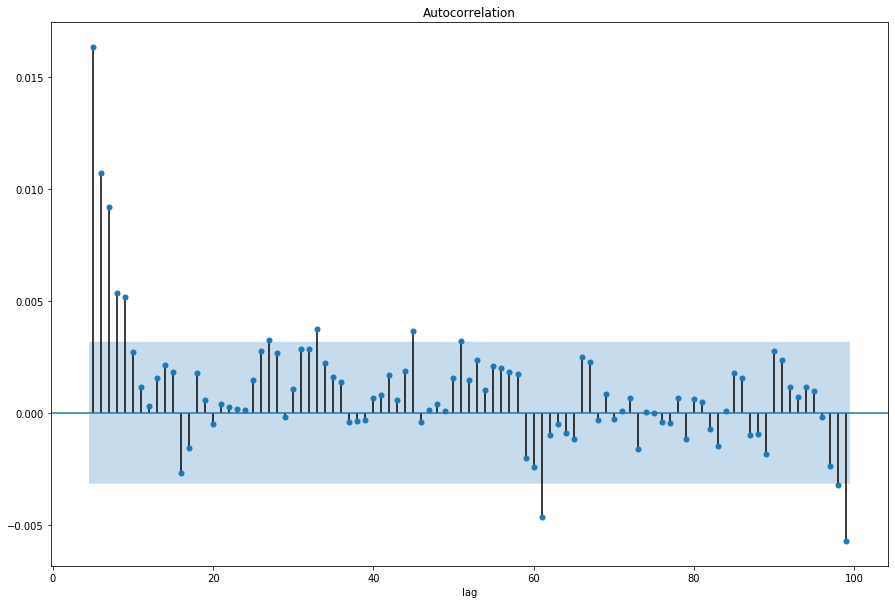

In [25]:
filename = "MonteCarlo_NVT_2/esercizio07_1/gas2/pressure.dat"

#carico i dati
f = open(filename, 'r')
pres = f.readlines()
pres_ = [float(t) for t in pres]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
pres_ = pres_[1000:]
lags_ = np.arange(5,100,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(pres_, lags=lags_)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

Dai grafici soprastanti si evince come entro i 5 lag la correlazione venga persa.

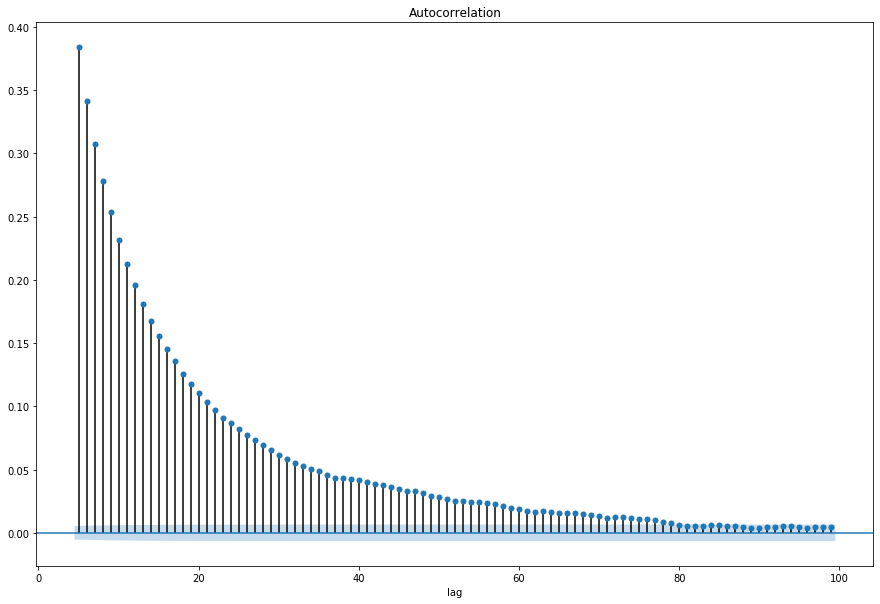

In [26]:
filename = "MonteCarlo_NVT_2/esercizio07_1/gas2/en_pot.dat"

#carico i dati
f = open(filename, 'r')
en = f.readlines()
en_ = [float(t) for t in en]

#elimino i primi 1000 step, durante i quali ho l'equilibrazione
en_ = en_[1000:]
lags_ = np.arange(5,100,1)

#plot autocorrelation function
fig = tsaplots.plot_acf(en_, lags=lags_)
fig.set_figwidth(15)
fig.set_figheight(10)
plt.xlabel('lag')
plt.show()

f.close()

### b)

In [27]:
dim_blocks = []

err_en = np.zeros(500)
err_p = np.zeros(500)

npoints = 500000

for i in range(1,501):
    
    dim_blocks.append(i*10)
    nblocks = math.floor(npoints/(i*10))

    sumA_en = 0
    sumA2_en = 0
    
    sumA_p = 0
    sumA2_p = 0
    
    for j in range(nblocks):
        
        A_en = 0
        A2_en = 0
        
        A_p = 0
        A2_p = 0

        for k in range(dim_blocks[i-1]):
            
            A_en = A_en + en_[j*dim_blocks[i-1]+k]
            A_p = A_p + pres_[j*dim_blocks[i-1]+k]
            
        A_en = A_en/dim_blocks[i-1] 
        A2_en = A_en**2
        
        A_p = A_p/dim_blocks[i-1]
        A2_p = A_p**2
        
        sumA_en = sumA_en + A_en
        sumA2_en = sumA2_en + A2_en
        
        sumA_p = sumA_p + A_p
        sumA2_p = sumA2_p + A2_p
    
    err_en[i-1] = np.sqrt((1./(nblocks-1))*(sumA2_en/nblocks-(sumA_en/nblocks)**2))
    err_p[i-1] = np.sqrt((1./(nblocks-1))*(sumA2_p/nblocks-(sumA_p/nblocks)**2))
    

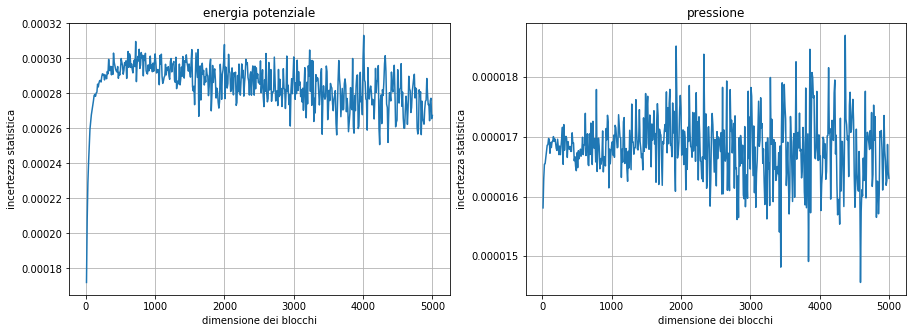

In [28]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)

plt.subplot(1,2,1)
plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('energia potenziale')
plt.plot(dim_blocks,err_en)
plt.grid(True)

plt.subplot(1,2,2)
plt.xlabel('dimensione dei blocchi')
plt.ylabel('incertezza statistica')
plt.title('pressione')
plt.plot(dim_blocks,err_p)
plt.grid(True)

In questo caso notiamo come per blocchi di dimensione maggiore di 300 step l'incertezza statistica saturi.

# Esercizio 07.4

Inizio col mostrare i grafici di energia e pressione ottenuti con il codice MC:

## Gas

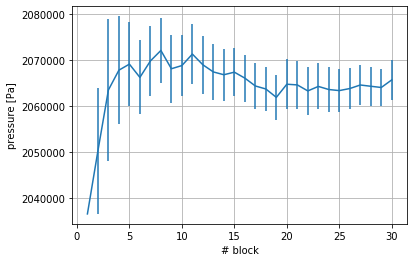

In [39]:
filename = "MonteCarlo_NVT_2/esercizio07_4_MC/gas/output.pres.0"
            
data = np.loadtxt(filename)
        
nbins = 100

npart = 108
rho = 0.8
vol = npart/rho
box = vol**(1.0/3.0)

bin_size = box/(2.0*nbins)
r = np.zeros(100)
        
for i in range(nbins):
    r[i] = i*bin_size

coeff = 120*1.380649*1e-23/((0.34**3)*1e-27)

plt.errorbar(data[:,0], coeff*data[:,2], yerr = coeff*data[:,3])

plt.ylabel("pressure [Pa]")
plt.xlabel("# block")
plt.grid(True)
plt.show()

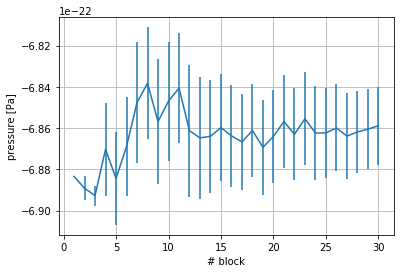

In [40]:
filename = "MonteCarlo_NVT_2/esercizio07_4_MC/gas/output.epot.0"
            
data = np.loadtxt(filename)
        
nbins = 100

npart = 108
rho = 0.8
vol = npart/rho
box = vol**(1.0/3.0)

bin_size = box/(2.0*nbins)
r = np.zeros(100)
        
for i in range(nbins):
    r[i] = i*bin_size

coeff = 120*1.380649*1e-23

plt.errorbar(data[:,0], coeff*data[:,2], yerr = coeff*data[:,3])

plt.ylabel("pressure [Pa]")
plt.xlabel("# block")
plt.grid(True)
plt.show()

Per il calcolo della funzione di distribuzione radiale occorre effettuare l'assegnazione delle distanze ai bin di un istogramma: ho riutilizzato la funzione scritta nella lezione 1, che era generale ed era pensata per svolgere questo compito con boundaries e numero di bin arbitrari.

## Fase liquida

Ho effettuato la simulazione di un liquido, con $\rho^\star = 0.8$, $T^\star = 1.1$, $r_c = 2.5$, e sfruttando 20 blocchi da 1500 time step l'uno (dimensione sufficiente per avere una stima corretta dell'incertezza statistica, come osservato nell'esercizio precedente) facendo uso del mio algoritmo che sfrutta il Metropolis. In seguito ho ripetuto il calcolo sfruttando l'algoritmo di dinamica molecolare, effettuando un'opportuna equilibrazione facendo ripartire il sistema più volte (almeno 5 in base a quanto visto nella lezione 4). In questo caso ho utilizzato 20 blocchi da 50 step ciascuno (in realtà 500, ma ai fini della misura si è preso solo uno step su 10 per evitare di avere configurazioni troppo correlate).

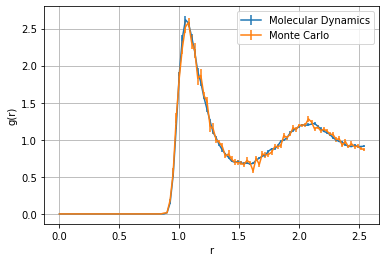

In [27]:
filename = "MonteCarlo_NVT_2/esercizio07_4_NVE/liquid/output.gofr.0"

data = np.loadtxt(filename)

filename = "MonteCarlo_NVT_2/esercizio07_4_NVE/liquid/output.gofr_err.0"

data_ = np.loadtxt(filename)

g_r = []
g_r_err = []
nblocks = 10
rho = 0.8
vol = 108/rho
box = vol**(1.0/3.0)
nbins = 100
bin_size = box/(2.0*nbins)
gofr = data[nblocks-1,:]
gofr_err = data_[nblocks-1,:]
r = np.zeros(100)

for i in range(nbins):
    r[i] = i*bin_size

plt.errorbar(r, gofr, yerr = gofr_err, label = "Molecular Dynamics")    
        

filename = "MonteCarlo_NVT_2/esercizio07_4_MC/liquid/output.gave.0"
            
data = np.loadtxt(filename)

g_r = []
g_r_err = []

for i in range(200):
    
    rem = divmod(i,2)
    
    #i numeri con indice pari sono g(r)...
    if rem[1] == 0:
        g_r.append(float(data[19][i]))
        
    #quelli con indice dispari, le rispettive incertezze.
    else:
        g_r_err.append(float(data[19][i]))
        
nbins = 100

npart = 108
rho = 0.8
vol = npart/rho
box = vol**(1.0/3.0)

bin_size = box/(2.0*nbins)
r = np.zeros(100)
        
for i in range(nbins):
    r[i] = i*bin_size
    
'''row = row.split("  ")
blocks.append(row[0])
mean.append(row[1])
mean_err.append(row[2])'''
    

plt.errorbar(r, g_r, yerr = g_r_err, label="Monte Carlo")
plt.legend()

plt.ylabel("g(r)")
plt.xlabel("r")
plt.grid(True)
plt.show()

Come si può osservare dal grafico, le due g(r) ricavate dalle simulazioni sono perfettamente compatibili fra loro. Questo giustifica tra l'altro la mia scelta del numero di blocchi e del numero di step per blocco.

## Fase gassosa

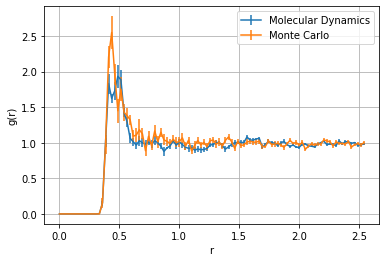

In [8]:
filename = "MonteCarlo_NVT_2/esercizio07_4_NVE/gas/output.gofr.0"

data = np.loadtxt(filename)

filename = "MonteCarlo_NVT_2/esercizio07_4_NVE/gas/output.gofr_err.0"

data_ = np.loadtxt(filename)

g_r = []
g_r_err = []
nblocks = 10
rho = 0.8
vol = 108/rho
box = vol**(1.0/3.0)
nbins = 100
bin_size = box/(2.0*nbins)
gofr = data[nblocks-1,:]
gofr_err = data_[nblocks-1,:]
r = np.zeros(100)

for i in range(nbins):
    r[i] = i*bin_size

plt.errorbar(r, gofr, yerr = gofr_err, label = "Molecular Dynamics")    
        

filename = "MonteCarlo_NVT_2/esercizio07_4_MC/gas/output.gave.0"
            
data = np.loadtxt(filename)

g_r = []
g_r_err = []

for i in range(200):
    
    rem = divmod(i,2)
    
    #i numeri con indice pari sono g(r)...
    if rem[1] == 0:
        g_r.append(float(data[19][i]))
        
    #quelli con indice dispari, le rispettive incertezze.
    else:
        g_r_err.append(float(data[19][i]))
        
nbins = 100

npart = 108
rho = 0.8
vol = npart/rho
box = vol**(1.0/3.0)

bin_size = box/(2.0*nbins)
r = np.zeros(100)
        
for i in range(nbins):
    r[i] = i*bin_size
    
'''row = row.split("  ")
blocks.append(row[0])
mean.append(row[1])
mean_err.append(row[2])'''
    

plt.errorbar(r, g_r, yerr = g_r_err, label="Monte Carlo")
plt.legend()

plt.ylabel("g(r)")
plt.xlabel("r")
plt.grid(True)
plt.show()

Anche per quanto riguarda la fase gassosa le funzioni di distribuzione radiale sono perfettamente compatibili nei due casi.

## Fase Solida

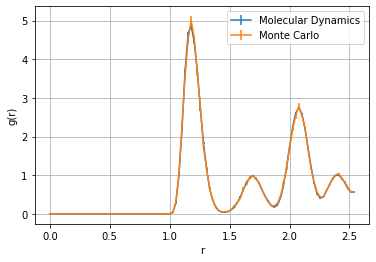

In [6]:
filename = "MonteCarlo_NVT_2/esercizio07_4_NVE/solid/output.gofr.0"

data = np.loadtxt(filename)

filename = "MonteCarlo_NVT_2/esercizio07_4_NVE/solid/output.gofr_err.0"

data_ = np.loadtxt(filename)

g_r = []
g_r_err = []
nblocks = 10
rho = 0.8
vol = 108/rho
box = vol**(1.0/3.0)
nbins = 100
bin_size = box/(2.0*nbins)
gofr = data[nblocks-1,:]
gofr_err = data_[nblocks-1,:]
r = np.zeros(100)

for i in range(nbins):
    r[i] = i*bin_size

plt.errorbar(r, gofr, yerr = gofr_err, label = "Molecular Dynamics")    
        

filename = "MonteCarlo_NVT_2/esercizio07_4_MC/solid/output.gave.0"
            
data = np.loadtxt(filename)

g_r = []
g_r_err = []

for i in range(200):
    
    rem = divmod(i,2)
    
    #i numeri con indice pari sono g(r)...
    if rem[1] == 0:
        g_r.append(float(data[19][i]))
        
    #quelli con indice dispari, le rispettive incertezze.
    else:
        g_r_err.append(float(data[19][i]))
        
nbins = 100

npart = 108
rho = 0.8
vol = npart/rho
box = vol**(1.0/3.0)

bin_size = box/(2.0*nbins)
r = np.zeros(100)
        
for i in range(nbins):
    r[i] = i*bin_size
    
'''row = row.split("  ")
blocks.append(row[0])
mean.append(row[1])
mean_err.append(row[2])'''
    

plt.errorbar(r, g_r, yerr = g_r_err, label="Monte Carlo")
plt.legend()

plt.ylabel("g(r)")
plt.xlabel("r")
plt.grid(True)
plt.show()

Anche in quest'ultimo caso le funzioni di distribuzione radiali sono compatibili tra loro. Si nota la presenza dei diversi picchi dovuti alla presenza della struttura cristallina che nella fase solida viene mantenuta.